In [1]:
import pandas as pd

def Database():
    """compile data sets into a data library, the output will be a DataFrame"""
    data_1 = pd.read_excel('data/Flash Point and Cetane Number Predictions for Fuel Compounds.xls', skiprows=3) ###load data
    data = data_1[['Name','Family', 'FP Exp.', 'CN Exp.']]  ###select columns
    result_1 = data.drop(index=0)   ###rearrange the index
    result_1.reset_index(drop=True, inplace=True)
    names = ['Name', 'Family', 'Flash Point', 'Cetane Number']   ###rename columns
    result_1.columns = names
    data_2 = pd.read_excel('data/Flash Point and Cetane Number Predictions for Fuel Compounds.xls', skiprows=4)
    result_2 = data_2.loc[: , '-H': 'aaCa']   ###select specific columns
    smarts = ["[H]", "[CX4H3]", "[CX4H2]", "[CX4H1]", "[CX4H0]", "[CX3H2]", "[CX3H1]", "[CX3H0]", "[CX2H1]","[CX2H0]", "[CX4H2R]", "[CX4H1R]", "[CX4H0R]","[CX3H1R]","[CX3H0R]","[cX3H1](:*):*", "[cX3H0](:*)(:*)*", "[OX2H1]", "[OX2H1][cX3]:[c]", "[OX2H0]", "[OX2H0R]", "[oX2H0](:*):*", "[CX3H0]=[O]", "[CX3H0R]=[O]", "[CX3H1]=[O]", "[CX3H0](=[O])[OX2H1]", "[CX3H0](=[O])[OX2H0]", "[cX3H0](:*)(:*):*"]   ###rename functional groups to SMARTS
    result_2.columns = smarts
    result = pd.concat([result_1, result_2], axis=1)   ###combine two dataframes into one dataframe
    return result

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

from sklearn import linear_model
from pandas.tools.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn import tree

In [38]:
df = Database()
df = df[np.isfinite(df['Flash Point'])]

In [39]:
train, test = train_test_split(df, test_size=0.1)

In [40]:
DT = tree.DecisionTreeRegressor(max_depth=3)
DT.fit(train[train.columns[4:]], train['Flash Point'])

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

Train error 1394.0896850189233
Test error 1074.515725416797


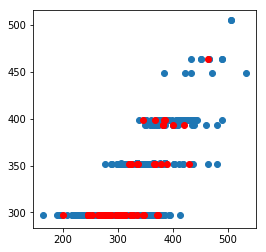

In [41]:
# make predictions on test and train set 
trainpred = DT.predict(train[train.columns[4:]])
testpred = DT.predict(test[test.columns[4:]])

#parity plot 
plt.figure(figsize=(4,4))
#plt.xlim([0,50]);
#plt.ylim([0,50]);
plt.scatter(train['Flash Point'], trainpred)
plt.scatter(test['Flash Point'], testpred, color='r')
#plt.plot([0,50],[0,50],lw=4,color='black')

#calculate the test and train error
print("Train error",mean_squared_error(train['Flash Point'], trainpred))
print("Test error",mean_squared_error(test['Flash Point'], testpred))

In [42]:
trainerror = []
testerror = []

trees = np.arange(1,20,1)

for t in trees:
    model = tree.DecisionTreeRegressor(max_depth=t)
    DT.fit(train[train.columns[4:]], train['Flash Point'])
    trainpred = DT.predict(train[train.columns[4:]])
    testpred = DT.predict(test[test.columns[4:]])
    trainerror.append(mean_squared_error(train['Flash Point'], trainpred))
    testerror.append(mean_squared_error(test['Flash Point'], testpred))

Text(0,0.5,'MSE for $Flash Point$')

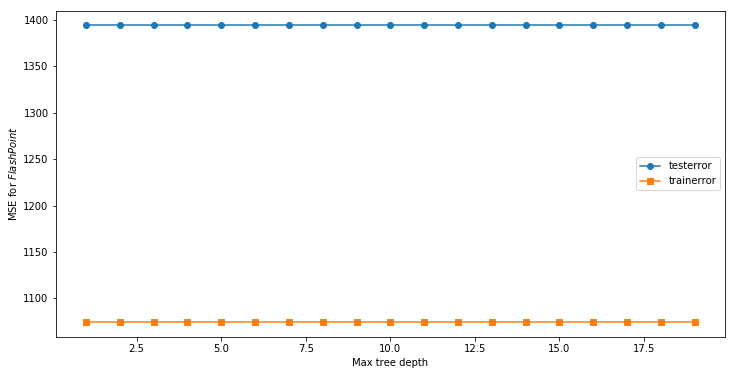

In [43]:
plt.figure(figsize=(12,6))
plt.plot(trees, trainerror,marker='o',label='testerror')
plt.plot(trees, testerror,marker="s",label='trainerror')
plt.legend()
plt.xlabel('Max tree depth')
plt.ylabel('MSE for $Flash Point$')